In [1]:
import sys
sys.path.append("..")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import torch
from IPython.display import display, update_display
from PIL import Image
from models.dalle.dalle import MinDalle, get_tokenizer, prepare_tokens

/home/ec2-user/.conda/envs/hack/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
torch.manual_seed(0)
torch.set_grad_enabled(False)
torch.backends.cudnn.enabled = True
torch.backends.cudnn.allow_tf32 = True

is_mega = False
device = "cuda:3"

root_dir='../pretrained'
model = MinDalle(is_mega=is_mega, root_dir=root_dir, device=device)
tokenizer = get_tokenizer(os.path.join(root_dir, f"dalle_{'mega' if is_mega else 'mini'}"))


def predict(text, seamless, grid_size, temperature, supercondition_factor, top_k):
    tokens = prepare_tokens(tokenizer, text, device)
    images = model(
        text_tokens=tokens,
        grid_size=grid_size,
        is_seamless=seamless,
        temperature=temperature,
        top_k=int(top_k),
        supercondition_factor=float(supercondition_factor)
    )

    for i, image in enumerate(images):
         Image.fromarray(image.numpy()).show()

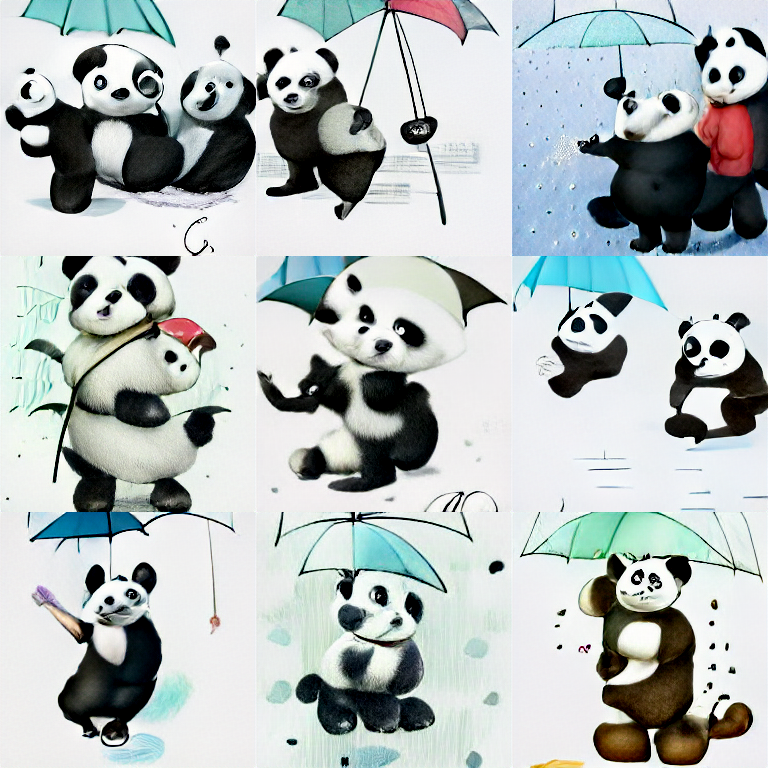

CPU times: user 7.66 s, sys: 49.7 ms, total: 7.71 s
Wall time: 7.71 s


In [8]:
%%time

predict(
    text="an illustration of a baby panda with headphones holding an umbrella in the rain",
    seamless=False,
    grid_size=3,
    temperature=1,
    supercondition_factor=16,
    top_k=128,
)